In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = sns.load_dataset('titanic')
iris= sns.load_dataset('iris')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


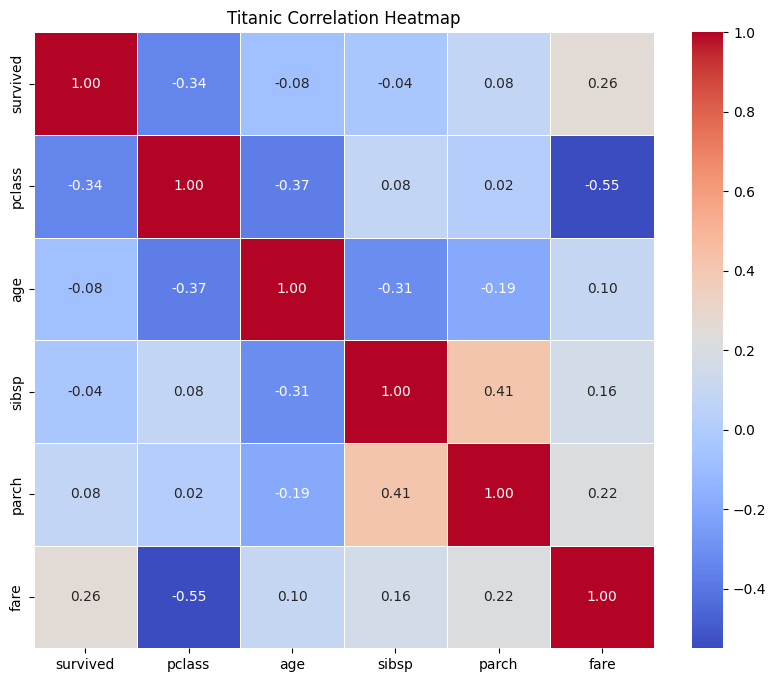

In [10]:
#for titanic dataset
df_numeric = df.select_dtypes(include=['number'])
df_corr_matrix = df_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title('Titanic Correlation Heatmap')
plt.show()

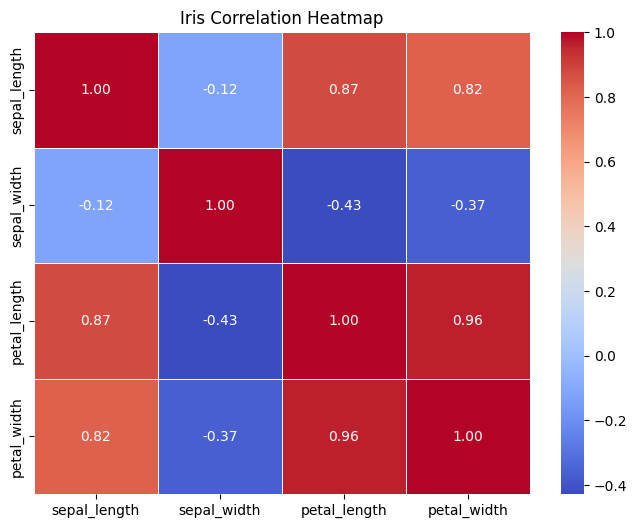

In [11]:
iris_numeric = iris.select_dtypes(include=['number'])
iris_corr_matrix = iris_numeric.corr()
plt.figure(figsize=(8,6))
sns.heatmap(iris_corr_matrix, annot=True,cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Iris Correlation Heatmap')
plt.show()

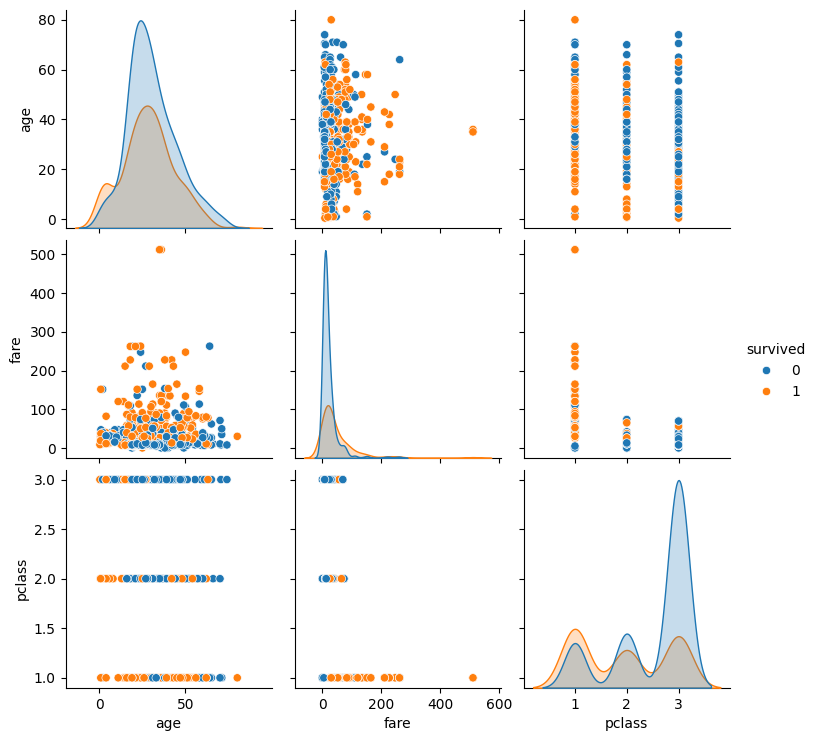

In [13]:
if all(col in df.columns for col in ['age', 'fare', 'pclass']):
    sns.pairplot(df, hue="survived", vars=["age", "fare", "pclass"])
    plt.show()
else:
    print("Required columns are missing in Titanic dataset.")


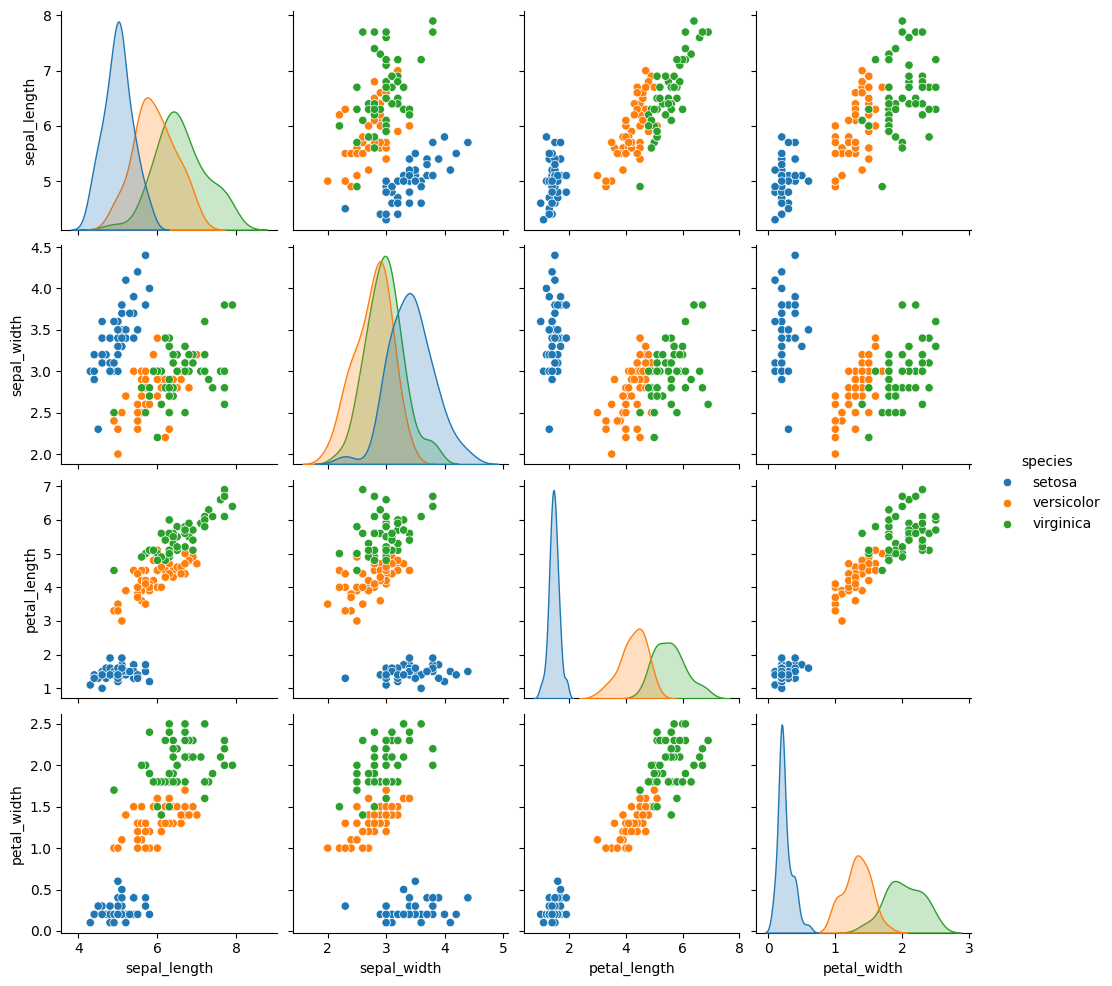

In [14]:
if all(col in iris.columns for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    sns.pairplot(iris, hue="species", vars=["sepal_length", "sepal_width", "petal_length", "petal_width"])
    plt.show()
else:
    print("Required columns are missing in Iris dataset.")


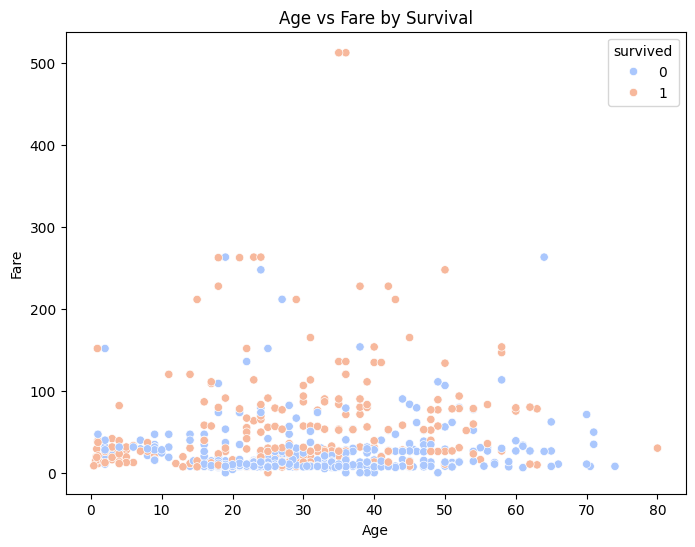

In [15]:
df = sns.load_dataset('titanic')

df = df.dropna(subset=['age', 'fare', 'pclass', 'survived'])  # Drop rows with missing key values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='fare', hue='survived', palette='coolwarm')
plt.title('Age vs Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

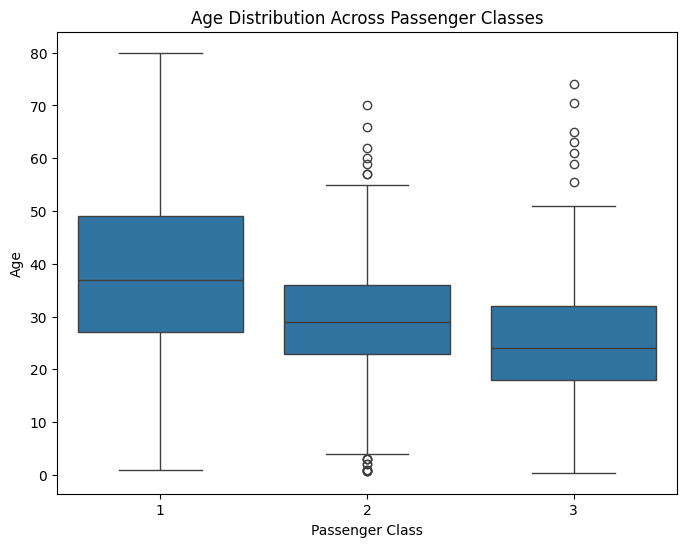

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='pclass', y='age')
plt.title('Age Distribution Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=['number'])  
corr_matrix = numeric_df.corr()

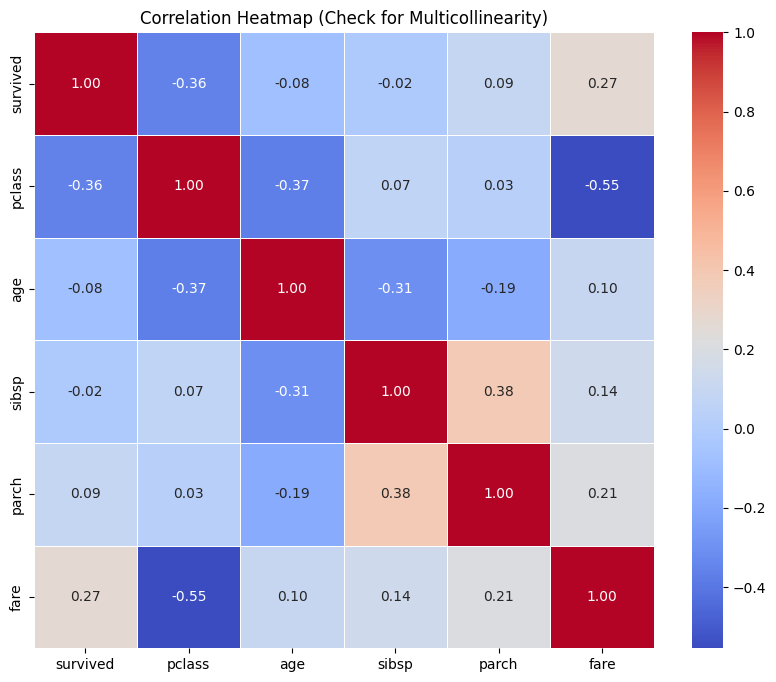

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Check for Multicollinearity)')
plt.show()

In [19]:
print("\nHighly correlated feature pairs (|corr| > 0.7):")
threshold = 0.7
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = [(a, b, corr_matrix.loc[a, b]) for a, b in corr_pairs.index if a != b and abs(corr_matrix.loc[a, b]) > threshold]
for a, b, corr in high_corr:
    print(f"{a} and {b}: {corr:.2f}")


Highly correlated feature pairs (|corr| > 0.7):
